In [1]:
import pandas as pd

# Set start and end date
start_date = "2021-09-26"
end_date = "2023-11-09"

traffic = pd.read_csv("traffic2021-2023.csv")

traffic["MessungDatZeit"] = pd.to_datetime(traffic["MessungDatZeit"], format="%Y-%m-%d %H:%M:%S")
traffic = traffic.loc[(traffic["MessungDatZeit"] >= start_date) & (traffic["MessungDatZeit"] <= end_date)]

traffic.columns = ["Date", "Traffic"]

traffic.set_index("Date", inplace = True)
traffic

,Traffic
Date,
2021-09-26 00:00:00,39089.0
2021-09-26 01:00:00,29416.0
2021-09-26 02:00:00,21434.0
2021-09-26 03:00:00,18787.0
2021-09-26 04:00:00,17307.0
...,...
2023-11-08 20:00:00,52933.0
2023-11-08 21:00:00,47652.0
2023-11-08 22:00:00,39771.0


In [2]:
traffic.describe()

,Traffic
count,18479.000000
mean,56099.390876
std,31660.887473
min,2936.000000
25%,25587.500000
50%,63207.000000
75%,83259.000000
max,114367.000000


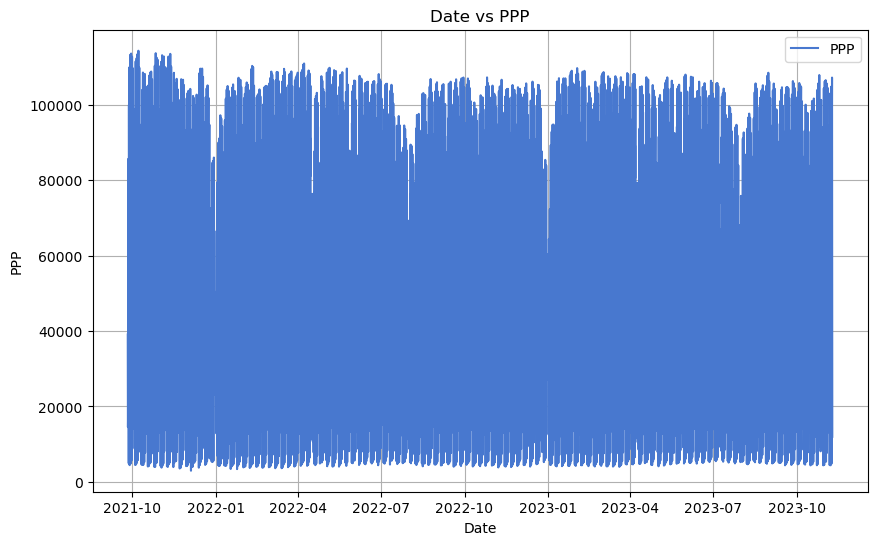

In [11]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(traffic.index, traffic["Traffic"], label = "PPP")

# Formatting
plt.title('Date vs PPP')
plt.xlabel('Date')
plt.ylabel('PPP')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import statsmodels.api as st

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

from statsmodels.tsa.seasonal import seasonal_decompose

 
    
plt.style.use("seaborn-v0_8-muted")

In [13]:
# Helpful functions for showing results of analysis

# Show summary statistics for different time frames
def split_series(series):
    X = series.values
    split1, split2 = round(len(X) / 3), round(len(X) / 3)*2
    X1, X2, X3 = X[0:split1], X[split1:split2], X[split2:]
    mean1, mean2, mean3 = X1.mean(), X2.mean(), X3.mean()
    std1, std2, std3 = X1.std(), X2.std(), X3.std()
    print(f"The means are{mean1: 0.2f},{mean2: 0.2f} and{mean3: 0.2f}")
    print(f"The stds are{std1: 0.2f},{std2: 0.2f} and{std3: 0.2f}")

# Run KPSS test (Null hypothesis: x is level or trend stationary)
def kpss_test(series):
    print("Results of KPSS Test:")
    kpsstest = kpss(series, regression="ct", nlags="auto")
    print(f"Test Statistic {kpsstest[0]:0.3f}")
    print(f"p-value: {kpsstest[1]: 0.4f}")
    print(f"Lags used: {kpsstest[2]: 0.0f}")


# Run a Augmented Dickey-Fuller test (Null hypothesis: time series contains a unit root and is non-stationary)
def run_test(series):
    result=adfuller (series, autolag="AIC", regression = "ctt")
    print(f"Results of the AD Fuller test:")
    print(f"Test Statistic: {result[0]: 0.3f}")
    print(f"p-value: {result[1]: 0.4f}")
    
# Plot results
def plot_three(series, title, window_size = 24*7):
    figs = plt.figure(figsize=(10, 6))
    fig, axs = plt.subplots(2,1, figsize=(10,6))
    
    # Set a title
    figs.suptitle(title, fontweight = "bold", fontsize = 16)
    
    gs = figs.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
    
    # Create the Axes for subplots.
    ax = figs.add_subplot(gs[1, 0])
    ax.tick_params(axis='x', which='major')
    ax_histx = figs.add_subplot(gs[0, 0], )
    ax_histy = figs.add_subplot(gs[1, 1])

    
    # Format x axis
    date_form = DateFormatter("%b-%Y")
    ax.xaxis.set_major_formatter(date_form)
    
    # Populate the Axes.
    ax.plot(series, alpha = 0.8)
    ax.set_xlabel("Passengers")
    ax_histx.hist(series, alpha=0.5, edgecolor = "black", color = "pink")
    # Add moving average 
    rolling = series.rolling(window=window_size).mean()
    ax_histy.hist(rolling, alpha=0.5, orientation="horizontal", edgecolor = "black", color = "pink")
    ax_histy.set_yticklabels([])
    ax_histx.set_xticklabels([])
    ax_histx.set_title("Distribution of Sunshine")
    ax_histy.set_title(f'Rolling means', rotation=0)
    
    # Plot series and Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
    st.graphics.tsa.plot_pacf(series, ax = axs[0], lags = 24)
    st.graphics.tsa.plot_acf(series, axs[1], lags = 24)
    plt.tight_layout()
    # Run the tests
    run_test(series)
    print("----------------")
    kpss_test(series)
    print("----------------")
    split_series(series)

In [14]:
#transform = np.log(traffic)
transform = traffic
transform

,Traffic
Date,
2021-09-26 00:00:00,39089.0
2021-09-26 01:00:00,29416.0
2021-09-26 02:00:00,21434.0
2021-09-26 03:00:00,18787.0
2021-09-26 04:00:00,17307.0
...,...
2023-11-08 20:00:00,52933.0
2023-11-08 21:00:00,47652.0
2023-11-08 22:00:00,39771.0


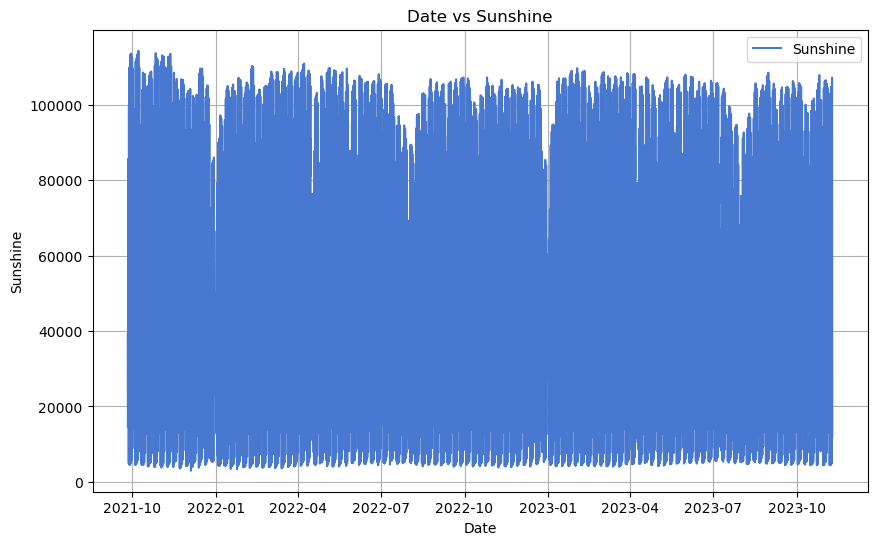

In [15]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(transform.index, transform["Traffic"], label = "Sunshine")

# Formatting
plt.title('Date vs Sunshine')
plt.xlabel('Date')
plt.ylabel('Sunshine')
plt.legend()
plt.grid(True)
plt.show()

Results of the AD Fuller test:
Test Statistic: -29.117
p-value:  0.0000
----------------
Results of KPSS Test:
Test Statistic 0.003
p-value:  0.1000
Lags used:  57
----------------
The means are 0.54, 8.10 and-21.38
The stds are 9370.77, 6618.16 and 9613.05


/var/folders/bp/ly_w1kqj7gs4yy61jdj69bqr0000gn/T/ipykernel_6895/2081436272.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(series, regression="ct", nlags="auto")


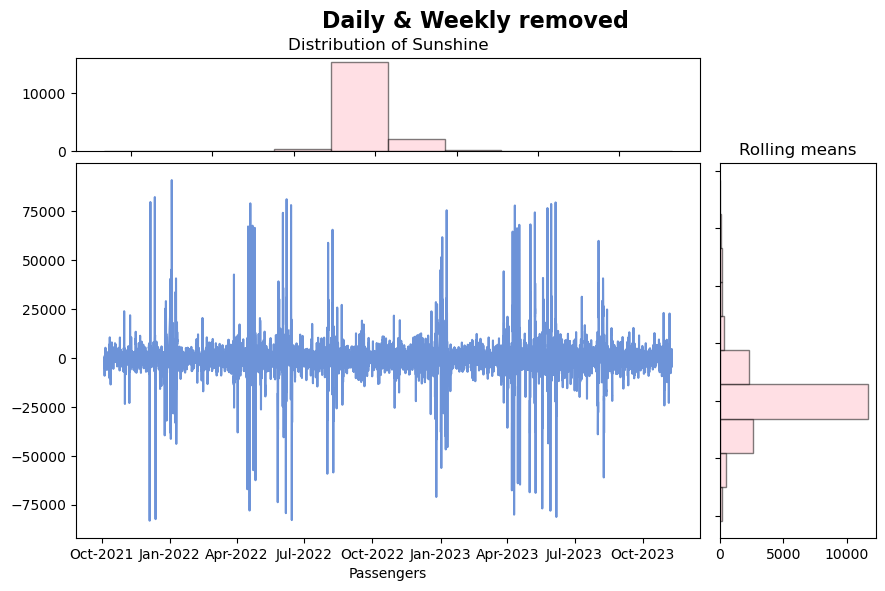

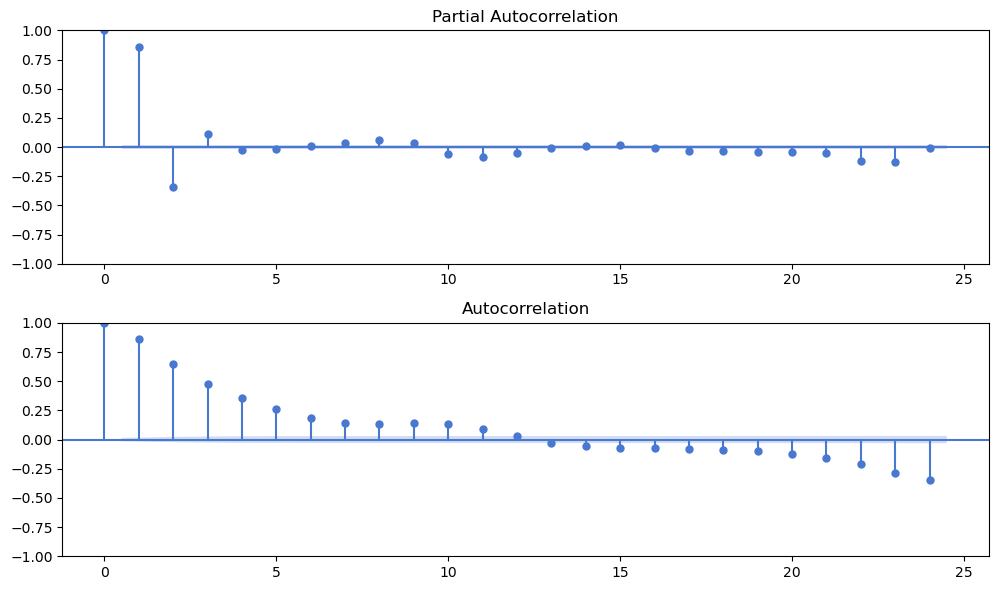

In [16]:
# Eliminate daily seasonality
daily_24 = transform.diff(24).diff(24*7).dropna()
plot_three(daily_24.Traffic, "Daily & Weekly removed")

In [17]:
daily_24.describe()

,Traffic
count,18287.000000
mean,-4.243834
std,8641.603179
min,-83204.000000
25%,-1788.500000
50%,18.000000
75%,1759.000000
max,91055.000000


,Traffic
Date,
2021-10-04 00:00:00,0.470616
2021-10-04 01:00:00,0.472331
2021-10-04 02:00:00,0.472337
2021-10-04 03:00:00,0.474443
2021-10-04 04:00:00,0.476205


Results of the AD Fuller test:
Test Statistic: -29.117
p-value:  0.0000
----------------
Results of KPSS Test:
Test Statistic 0.003
p-value:  0.1000
Lags used:  57
----------------
The means are 0.48, 0.48 and 0.48
The stds are 0.05, 0.04 and 0.06


/var/folders/bp/ly_w1kqj7gs4yy61jdj69bqr0000gn/T/ipykernel_6895/2081436272.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(series, regression="ct", nlags="auto")


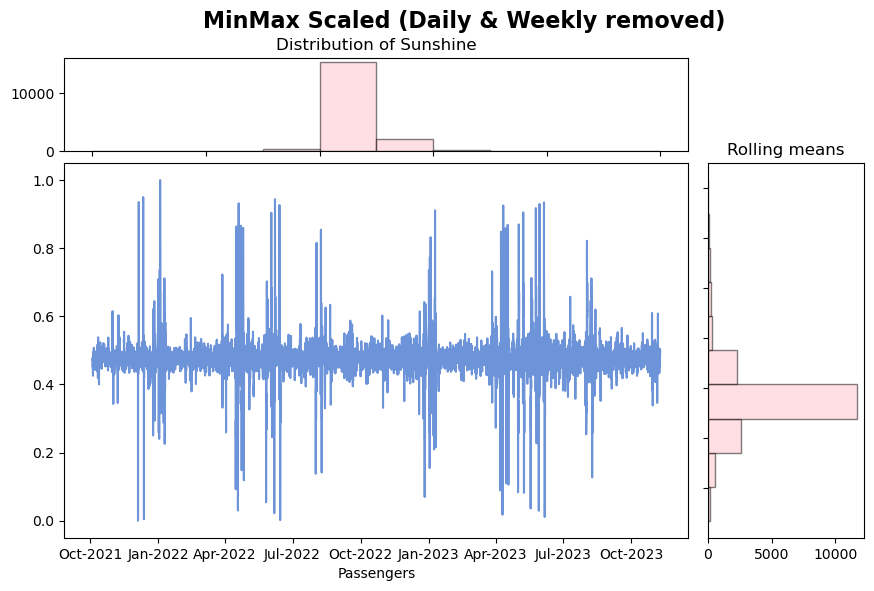

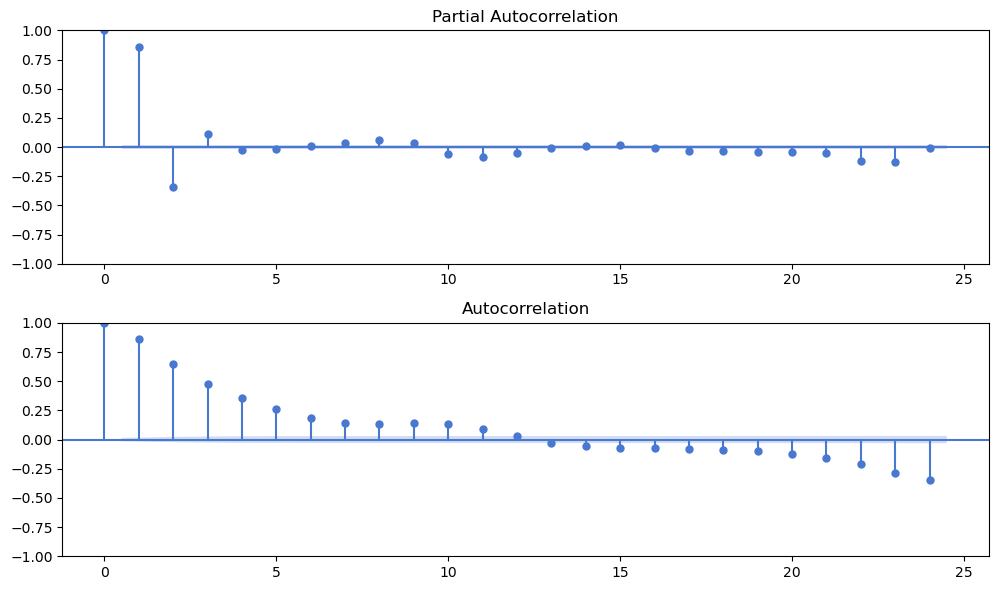

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
daily_24["Traffic"] = scaler.fit_transform(daily_24["Traffic"].values.reshape(-1, 1))
display(daily_24.head())
plot_three(daily_24.Traffic, "MinMax Scaled (Daily & Weekly removed)")

In [12]:
daily_24.to_csv("traffic_scaled.csv")